In [24]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv('patient_heart_rate.csv')
df.head(10)

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
5,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72
6,7.0,Dewey McDuck,19.0,56kgs,-,-,-,71,78,75
7,8.0,Scööpy Doo,32.0,78kgs,78,76,75,-,-,-
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#Xử lý vấn đề một cột lưu hỗn hợp nhiều dữ liệu 
#ở đây là cột “Name” chứa bao gồm "Firstname” và “Lastname”, giải pháp là ta sẽ tách ra làm 2 cột
df[['Firstname', 'Lastname']] = df['Name'].str.split(expand= True)
df.head(5)
df.drop('Name', axis=1)

,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,189lbs,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56kgs,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78kgs,78,76,75,-,-,-,Scööpy,Doo
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Cột Weight có vấn đề về không thống nhất các đơn vị đo lường trong dữ liệu. 
# Ta sẽ chuyển các đơn vị về thành đơn vị chuẩn “kg”
weight = df['Weight']
for i in range (0,len(weight)):
    x = str(weight[i])
    if 'lbs' in x[-3:]:
        x = x[:-3:]
        float_x = float(x)
        y = int(float_x/2.2)
        weight[i] = y
    if 'kgs' in x[-3:]:
        x = x[:-3:]
        float_x = float(x)
        weight[i] = x

/var/folders/n5/1571yh0x7_g0dbltk948d2tm0000gn/T/ipykernel_9340/1539342277.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = x
/var/folders/n5/1571yh0x7_g0dbltk948d2tm0000gn/T/ipykernel_9340/1539342277.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = y
/var/folders/n5/1571yh0x7_g0dbltk948d2tm0000gn/T/ipykernel_9340/1539342277.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = x
/var/folders/

In [28]:
df.head()

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,Mickéy Mousé,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,Donald Duck,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,Scrooge McDuck,NaN,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,Pink Panther,54.0,90,-,-,-,69,NaN,75,Pink,Panther


In [29]:
df.rename(columns={'Weight':'Weight_kgs'}, inplace=True)
df.head()

,Id,Name,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,Mickéy Mousé,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,Donald Duck,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,Scrooge McDuck,NaN,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,Pink Panther,54.0,90,-,-,-,69,NaN,75,Pink,Panther


In [30]:
#Vấn đề về xuất hiện dòng dữ liệu rỗng (không có giá trị: NaN). Giải pháp có thể đưa ra là xóa bỏ
df.dropna(how = 'all', inplace=True)
df.head()

,Id,Name,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,Mickéy Mousé,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,Donald Duck,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,Scrooge McDuck,NaN,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,Pink Panther,54.0,90,-,-,-,69,NaN,75,Pink,Panther


In [31]:
#Có nhiều dòng dữ liệu bị trùng lắp thông tin hoàn toàn[fullname, lastname, age,
#weight_kgs,....], giải pháp đưa ra là chỉ giữ lại một dòng dữ liệu, tuy nhiên giải pháp phải
#dựa trên nghiệp vụ của tập dữ liệu và quan sát của người xử lý.
df.drop_duplicates(subset=['Firstname', 'Lastname', 'Age', 'Weight_kgs'])
df.head()

,Id,Name,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,Mickéy Mousé,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,Donald Duck,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,Scrooge McDuck,NaN,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,Pink Panther,54.0,90,-,-,-,69,NaN,75,Pink,Panther


In [32]:
#Xuất hiện dữ liệu bị ảnh hưởng bởi lỗi non-ASCII, không định dạng ASCII. 
# Giải pháp:
#Tùy vào nghiệp vụ ta có thể: xóa dữ liệu tại đó, thay thế bằng dữ liệu khác hoặc thay
#bằng việc đánh dấu bằng một kí tự khác (ví dụ: ‘warning’)
df.Firstname.replace({r'[^\x00-\x7F]+': ''}, regex=True, inplace=True)
df.Lastname.replace({r'[^\x00-\x7F]+': ''}, regex=True, inplace=True)
df

,Id,Name,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,Mickéy Mousé,56.0,70,72,69,71,-,-,-,Micky,Mous
1,2.0,Donald Duck,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,Scrooge McDuck,NaN,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,Pink Panther,54.0,90,-,-,-,69,NaN,75,Pink,Panther
5,6.0,Huey McDuck,52.0,85,-,-,-,68,75,72,Huey,McDuck
6,7.0,Dewey McDuck,19.0,56,-,-,-,71,78,75,Dewey,McDuck
7,8.0,Scööpy Doo,32.0,78,78,76,75,-,-,-,Scpy,Doo
10,9.0,Huey McDuck,52.0,85,-,-,-,68,75,72,Huey,McDuck
11,10.0,Louie McDuck,12.0,45,-,-,-,92,95,87,Louie,McDuck


In [34]:
#“Missing values”, vấn đề này xảy ra tại các cột “Age”, “Weight” và “Heart Rate”. 
#Thiếu dữ liệu (dữ liệu không đầy đủ) là vấn đề xảy ra nhiều trong các nguồn dữ liệu do nhiều
#nguyên nhân chủ quan lẫn khách quan. Có một vài giải pháp để xử lý vấn đề này, chủ yếu
#dựa trên kinh nghiệm và nghiệp vụ về tập dữ liệu đó. Một số giải pháp đưa đề xuất từ
#chuyên gia như sau:
#a. Deletion: Remove records with missing values
#b. Dummy substitution: Replace missing values with a dummy but valid value: e.g.: 0 for numerical values.
#c. Mean substitution: Replace the missing values with the mean.
#d. Frequent substitution: Replace the missing values with the most frequent item.
#e. Improve the data collector: Your business folk will talk to the clients
#and inform them about why it is worth fixing the problem with the data collector.
################################################################
#Thay giá trị thiếu của tuổi bằng giá trị yếu vị.
df['Age'].fillna(df['Age'].mode()[0],inplace=True)
# Thay giá trị thiếu của cân nặng bằng giá trị trung vị
df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)

In [ ]:
#“Một cột chứa quá nhiều thông tin cần được phân rã”, như trong bài toán này ta thấy
#header “m0006” chứa các nội dung bao gồm: m → male, 0006 ~ 00-06 (lần đo chỉ số
#nhịp tim từ 00h- đến 06h). Còn giá trị thì là kết quả đo nhịp tim.
#Chúng ta sẽ tách nội dung của cột này ra làm 3 cột sau: PulseRate : giá trị nhịp tim,
# Sex:giới tính ( m: male, f: female) và time: thời gian (từ giờ-đến giờ) như sau:

In [39]:
df.columns = df.columns.astype(str)
df = df.reset_index()

In [43]:
#Bước 1: Tạo melt dữ liệu để có cột gender_time
#df = pd.melt(df, id_vars=['Id','Age','Weight_Kgs','Fistname','Lastname'],value_name='Pulse',var_name='gender_time').sort_values(['Id','Age','Weight_Kgs','Fistname','Lastname'])
df = pd.melt(
    df, 
    id_vars=['Id', 'Age', 'Weight_kgs', 'Firstname', 'Lastname'], 
    value_name='Pulse', 
    var_name='gender_time'
).sort_values(['Id', 'Age', 'Weight_kgs', 'Firstname', 'Lastname'])

In [44]:
df

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,Pulse
0,1.0,56.0,70,Micky,Mous,index,0
15,1.0,56.0,70,Micky,Mous,Name,Mickéy Mousé
30,1.0,56.0,70,Micky,Mous,m0006,72
45,1.0,56.0,70,Micky,Mous,m0612,69
60,1.0,56.0,70,Micky,Mous,m1218,71
...,...,...,...,...,...,...,...
59,15.0,52.0,81,NaN,NaN,m0612,-
74,15.0,52.0,81,NaN,NaN,m1218,-
89,15.0,52.0,81,NaN,NaN,f0006,68
104,15.0,52.0,81,NaN,NaN,f0612,75


In [45]:
#Bước 2: Tạo data frame tạm là kết quả của việc tách cột gender_time
df_temp = df['gender_time'].str.extract("(\D)(\d+)(\d{2})", expand=True)

In [48]:
#Bước 3: Đặt tên cột cho data frame tạm
df_temp.columns = ['Gender', 'Lower_hour', 'Upper_hour']
print(df_temp.columns)

Index(['Gender', 'Lower_hour', 'Upper_hour'], dtype='object')


In [49]:
#Bước 4: Nối data frame tạm vào data frame ban đầu
df = pd.concat([df, df_temp], axis=1)

In [ ]:
#Bước 5: Bỏ cột gender_time
df = df.drop(['gender_time'],axis=True)

In [62]:
df

,Id,Age,Weight_kgs,Firstname,Lastname,Pulse,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,0,NaN,NaN,NaN
15,1.0,56.0,70,Micky,Mous,Mickéy Mousé,NaN,NaN,NaN
30,1.0,56.0,70,Micky,Mous,72,m,00,06
45,1.0,56.0,70,Micky,Mous,69,m,06,12
60,1.0,56.0,70,Micky,Mous,71,m,12,18
...,...,...,...,...,...,...,...,...,...
59,15.0,52.0,81,NaN,NaN,-,m,06,12
74,15.0,52.0,81,NaN,NaN,-,m,12,18
89,15.0,52.0,81,NaN,NaN,68,f,00,06
104,15.0,52.0,81,NaN,NaN,75,f,06,12


In [63]:
#Loại bỏ hết các dòng dữ liệu thừa là những dòng có phần PulseRate có dấu -
import numpy as np
df = df.replace('-',np.nan).dropna(subset=['Pulse'])

In [64]:
df

,Id,Age,Weight_kgs,Firstname,Lastname,Pulse,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,0,NaN,NaN,NaN
15,1.0,56.0,70,Micky,Mous,Mickéy Mousé,NaN,NaN,NaN
30,1.0,56.0,70,Micky,Mous,72,m,00,06
45,1.0,56.0,70,Micky,Mous,69,m,06,12
60,1.0,56.0,70,Micky,Mous,71,m,12,18
...,...,...,...,...,...,...,...,...,...
28,14.0,52.0,78.0,UniLever,None,UniLever,NaN,NaN,NaN
14,15.0,52.0,81,NaN,NaN,16,NaN,NaN,NaN
89,15.0,52.0,81,NaN,NaN,68,f,00,06
104,15.0,52.0,81,NaN,NaN,75,f,06,12


In [67]:
#Nhận thấy có những bệnh nhân chưa ghi nhận họ tên (ví lý do nào đó)
df['Firstname'].isnull().sum()
df['Lastname'].isnull().sum()
#Nhưng giá trị nhịp tim và thời gian đo nhịp tim thì đầy đủ nên dữ liệu quan tâm là trị số
#nhịp tim vẫn dùng được, nên ta thay họ, tên bị thiếu thành Unknown
df['Firstname'].fillna('Unknown', inplace=True)
df['Lastname'].fillna('Unknown', inplace=True)
df

,Id,Age,Weight_kgs,Firstname,Lastname,Pulse,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,0,NaN,NaN,NaN
15,1.0,56.0,70,Micky,Mous,Mickéy Mousé,NaN,NaN,NaN
30,1.0,56.0,70,Micky,Mous,72,m,00,06
45,1.0,56.0,70,Micky,Mous,69,m,06,12
60,1.0,56.0,70,Micky,Mous,71,m,12,18
...,...,...,...,...,...,...,...,...,...
28,14.0,52.0,78.0,UniLever,Unknown,UniLever,NaN,NaN,NaN
14,15.0,52.0,81,Unknown,Unknown,16,NaN,NaN,NaN
89,15.0,52.0,81,Unknown,Unknown,68,f,00,06
104,15.0,52.0,81,Unknown,Unknown,75,f,06,12


In [68]:
#Sau khi xử lý thì index của dòng dữ liệu đã thay đổi lung tung, ta cần reset index lại cho theo khuôn mẫu
df = df.reset_index(drop=True)
df

,Id,Age,Weight_kgs,Firstname,Lastname,Pulse,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,0,NaN,NaN,NaN
1,1.0,56.0,70,Micky,Mous,Mickéy Mousé,NaN,NaN,NaN
2,1.0,56.0,70,Micky,Mous,72,m,00,06
3,1.0,56.0,70,Micky,Mous,69,m,06,12
4,1.0,56.0,70,Micky,Mous,71,m,12,18
...,...,...,...,...,...,...,...,...,...
65,14.0,52.0,78.0,UniLever,Unknown,UniLever,NaN,NaN,NaN
66,15.0,52.0,81,Unknown,Unknown,16,NaN,NaN,NaN
67,15.0,52.0,81,Unknown,Unknown,68,f,00,06
68,15.0,52.0,81,Unknown,Unknown,75,f,06,12


In [69]:
#Sau đó, lưu trữ dữ liệu đã xử lý thành công với tên file patient_heart_rate_clean.csv
df.to_csv('patient_heart_rate_clean.csv', index=False)

### PHÂN TÍCH DỮ LIỆU

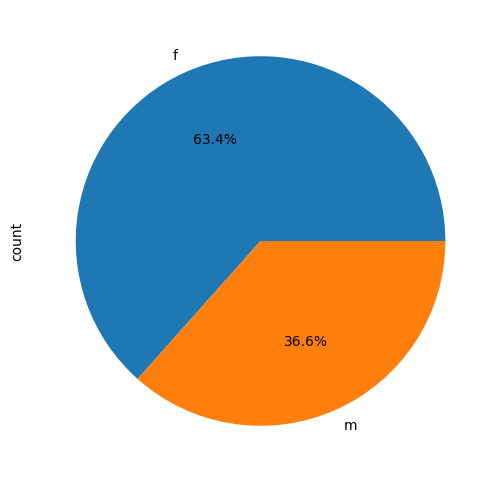

In [73]:
import matplotlib.pyplot as plt
#1. Vẽ biểu đồ Pie để thể hiện tỉ lệ bệnh nhân nam và nữ
df_gender = df['Gender'].value_counts()
df_gender.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%')
plt.show()

In [75]:
#2. Hãy tạo cột Fullname = Firstname+’ ‘+Lastname
df['Fullname'] = df['Firstname'] +'' + df['Lastname']
df

,Id,Age,Weight_kgs,Firstname,Lastname,Pulse,Gender,Lower_hour,Upper_hour,Fullname
0,1.0,56.0,70,Micky,Mous,0,NaN,NaN,NaN,MickyMous
1,1.0,56.0,70,Micky,Mous,Mickéy Mousé,NaN,NaN,NaN,MickyMous
2,1.0,56.0,70,Micky,Mous,72,m,00,06,MickyMous
3,1.0,56.0,70,Micky,Mous,69,m,06,12,MickyMous
4,1.0,56.0,70,Micky,Mous,71,m,12,18,MickyMous
...,...,...,...,...,...,...,...,...,...,...
65,14.0,52.0,78.0,UniLever,Unknown,UniLever,NaN,NaN,NaN,UniLeverUnknown
66,15.0,52.0,81,Unknown,Unknown,16,NaN,NaN,NaN,UnknownUnknown
67,15.0,52.0,81,Unknown,Unknown,68,f,00,06,UnknownUnknown
68,15.0,52.0,81,Unknown,Unknown,75,f,06,12,UnknownUnknown


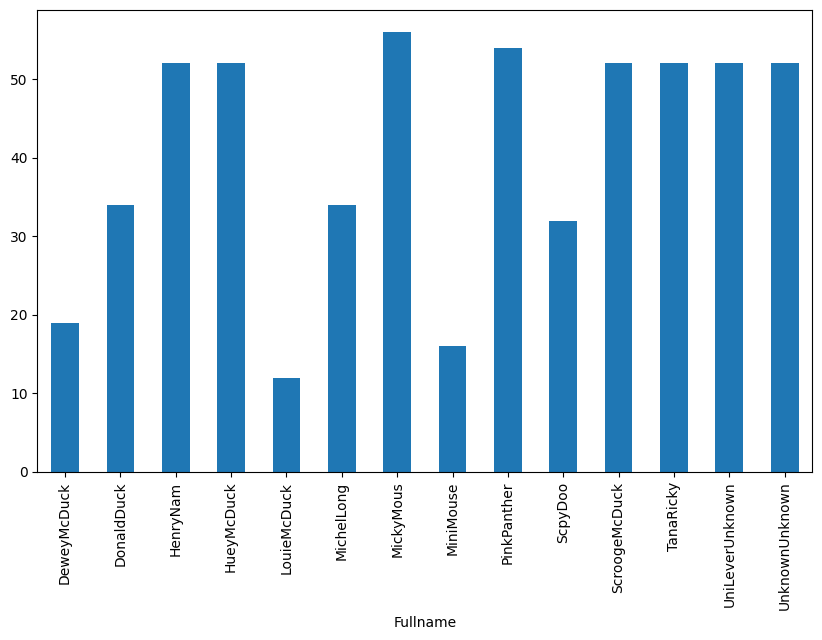

In [76]:
#3. Vẽ biểu đồ cột so sánh độ tuổi giữa các tên bệnh nhân
df_age = df.groupby('Fullname')['Age'].mean()
df_age.plot(kind='bar', figsize=(10, 6))
plt.show()

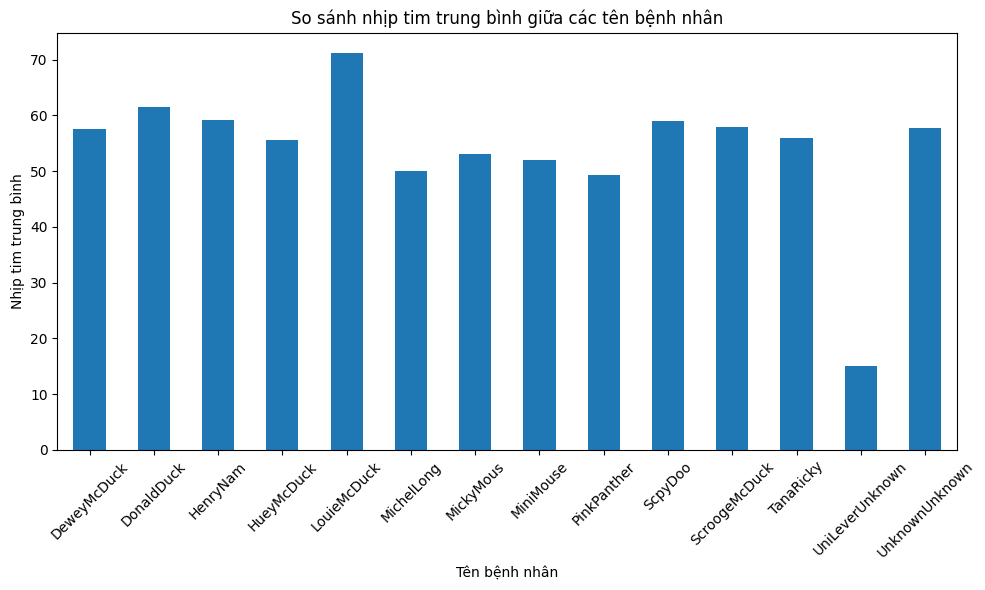

In [78]:
#4. Vẽ biểu đồ cột so sánh nhịp tim trung bình giữa các tên bệnh nhân
# Chuyển đổi cột 'Pulse' sang kiểu số, bỏ qua lỗi
df['Pulse'] = pd.to_numeric(df['Pulse'], errors='coerce')

# Tính nhịp tim trung bình theo tên
df_pulse = df.groupby('Fullname')['Pulse'].mean()

# Vẽ biểu đồ
df_pulse.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tên bệnh nhân')
plt.ylabel('Nhịp tim trung bình')
plt.title('So sánh nhịp tim trung bình giữa các tên bệnh nhân')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

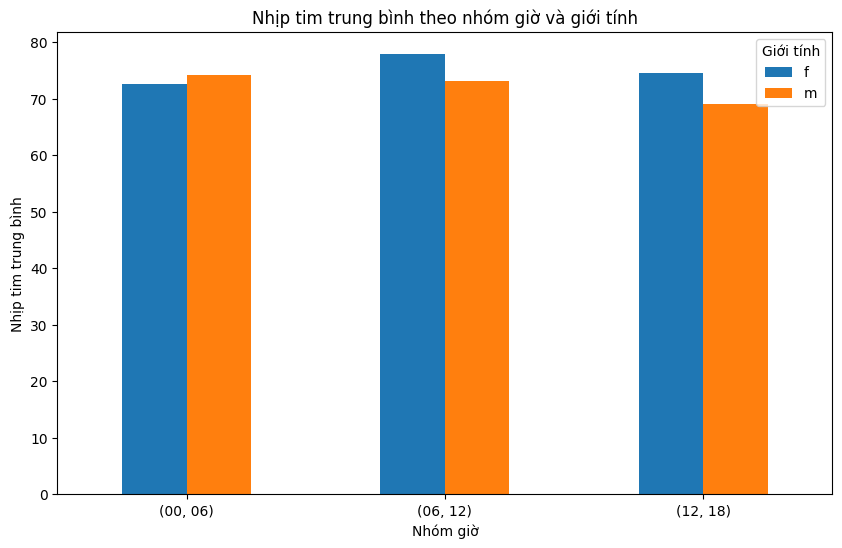

In [79]:
#5. Vẽ biểu đồ cột so sánh nhịp tim trung bình theo từng nhóm giờ 00-06, 06-12,12-18 có phân loại theo giới tính
# Chuyển đổi cột 'Pulse' sang dạng số và bỏ các giá trị không hợp lệ
df['Pulse'] = pd.to_numeric(df['Pulse'], errors='coerce')

# Lọc các giá trị có Lower_hour, Upper_hour và Gender hợp lệ
df = df.dropna(subset=['Lower_hour', 'Upper_hour', 'Gender'])

# Nhóm dữ liệu theo Lower_hour, Upper_hour và Gender, sau đó tính trung bình nhịp tim
grouped_df = df.groupby(['Lower_hour', 'Upper_hour', 'Gender'])['Pulse'].mean().unstack()

# Vẽ biểu đồ cột
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Nhịp tim trung bình theo nhóm giờ và giới tính')
plt.xlabel('Nhóm giờ')
plt.ylabel('Nhịp tim trung bình')
plt.xticks(rotation=0)
plt.legend(title='Giới tính')
plt.show()

/var/folders/n5/1571yh0x7_g0dbltk948d2tm0000gn/T/ipykernel_9340/1420310170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pulse'] = pd.to_numeric(df['Pulse'], errors='coerce')


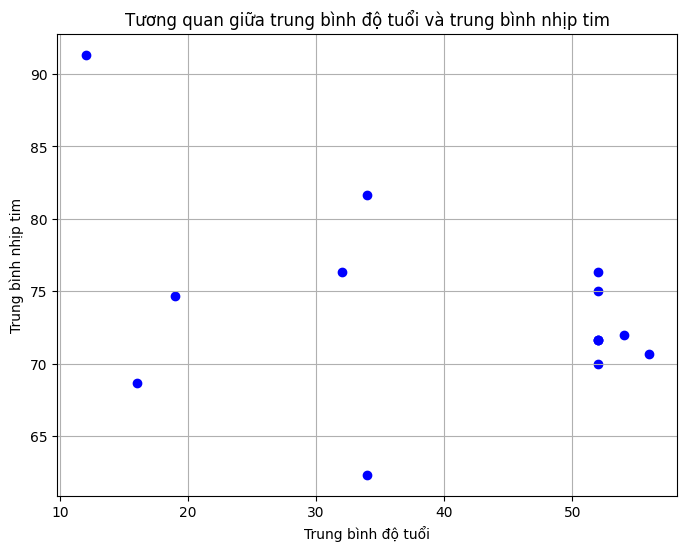

In [80]:
#6. Vẽ biểu đồ phân tán thể hiện tương quan giữa trung bình độ tuổi và trung bình nhịp tim
# Chuyển đổi cột 'Pulse' sang dạng số và bỏ các giá trị không hợp lệ
df['Pulse'] = pd.to_numeric(df['Pulse'], errors='coerce')

# Tính trung bình độ tuổi và nhịp tim cho mỗi nhóm Id
avg_data = df.groupby('Id').agg({'Age': 'mean', 'Pulse': 'mean'}).reset_index()

# Vẽ biểu đồ phân tán
plt.figure(figsize=(8, 6))
plt.scatter(avg_data['Age'], avg_data['Pulse'], color='blue')
plt.title('Tương quan giữa trung bình độ tuổi và trung bình nhịp tim')
plt.xlabel('Trung bình độ tuổi')
plt.ylabel('Trung bình nhịp tim')
plt.grid(True)
plt.show()

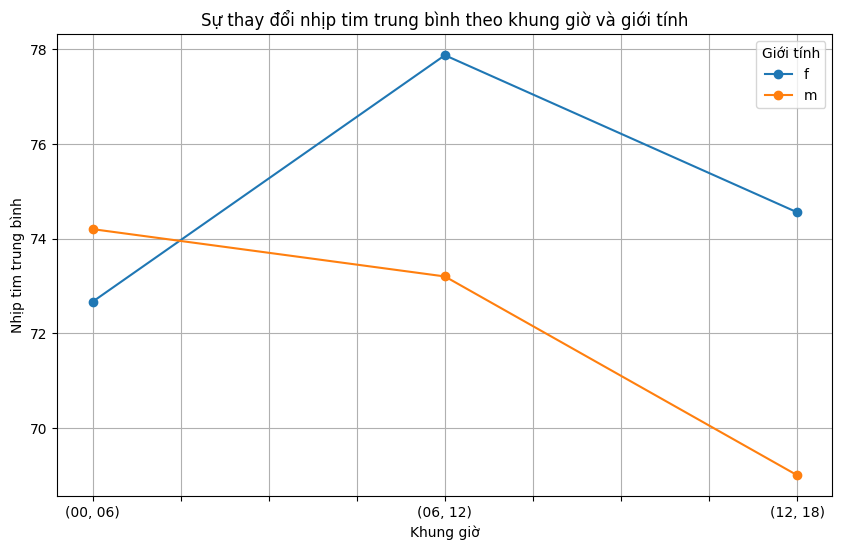

In [84]:
#7. Vẽ biểu đồ đường thể hiện sự thay đổi của nhịp tim trung bình các bệnh nhân theo thứ tự khung giờ 00-06, 06-12,12-18 theo từng nhóm giới tính.
# Chuyển đổi cột 'Pulse' sang dạng số và bỏ các giá trị không hợp lệ
df['Pulse'] = pd.to_numeric(df['Pulse'], errors='coerce')

# Lọc các giá trị có Lower_hour, Upper_hour và Gender hợp lệ
df = df.dropna(subset=['Lower_hour', 'Upper_hour', 'Gender'])

# Nhóm dữ liệu theo Lower_hour, Upper_hour và Gender, sau đó tính trung bình nhịp tim
grouped_df = df.groupby(['Lower_hour', 'Upper_hour', 'Gender'])['Pulse'].mean().unstack()

# Vẽ biểu đồ đường
grouped_df.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Sự thay đổi nhịp tim trung bình theo khung giờ và giới tính')
plt.xlabel('Khung giờ')
plt.ylabel('Nhịp tim trung bình')
plt.xticks(rotation=0)
plt.legend(title='Giới tính')
plt.grid(True)
plt.show()